In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [9]:
listings_df = pd.read_csv('./listings.csv')
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [10]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [11]:
listings_df_clean = listings_df[['id', 'host_id', 'host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
                                'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified',
                                'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
                                'bedrooms', 'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
                                'maximum_nights', 'availability_365', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 
                                 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                                 'review_scores_value', 'requires_license', 'instant_bookable', 'cancellation_policy', 'reviews_per_month']]
listings_df_clean['price'].describe()

count        3585
unique        324
top       $150.00
freq          144
Name: price, dtype: object

In [12]:
ratings_clean = listings_df_clean.dropna(axis = 0, subset= ['review_scores_rating'])
ratings_clean.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,reviews_per_month
1,3075044,2572247,2012-06-07,within an hour,100%,100%,f,Roslindale,1,1,...,10.0,9.0,10.0,10.0,9.0,9.0,f,t,moderate,1.30
2,6976,16701,2009-05-11,within a few hours,100%,88%,t,Roslindale,1,1,...,10.0,9.0,10.0,10.0,9.0,10.0,f,f,moderate,0.47
3,1436513,6031442,2013-04-21,within a few hours,100%,50%,f,NaN,1,1,...,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate,1.00
4,7651065,15396970,2014-05-11,within an hour,100%,100%,t,Roslindale,1,1,...,10.0,10.0,10.0,10.0,9.0,10.0,f,f,flexible,2.25
5,12386020,64200298,2016-03-23,within a few hours,100%,95%,t,Roslindale,2,2,...,10.0,10.0,10.0,10.0,9.0,10.0,f,f,flexible,1.70


1) Property types (pie chart)
2) Same number of rooms/ map with prices
3) Price vs rating (scatter)
4) Host response time vs ratings (scatter)
5) Price by neighborhood (bar chart)
6) Price by neighborhood (box & whisker)
7) Availability vs ratings (scatter)
8) Cancelation policy (pie)
9) Ratings by Property Type (bar chart)

After we analyze correlation, choose top 5 and check amount of reviews per year.
If I was purchasing a porperty for Airbnb in Boston:
 1) what is the highest rated property type
 2) best practices as a property owner (response time, availability, cancellation policy)
 3) Best neighborhood to purchase in

In [13]:
# Property types pie chart
prop = ratings_clean['property_type'].unique()
prop_type = ratings_clean.dropna(axis = 0, subset= ['property_type'])

# Collapsing smallest four property types into other
prop_type = prop_type.replace({'Villa': 'Other', 'Dorm': 'Other', 'Entire Floor': 'Other', 'Guesthouse': 'Other' })

prop_count = prop_type['property_type'].value_counts()
count = list(prop_count)
count

[1980, 479, 177, 46, 32, 30, 15, 11]

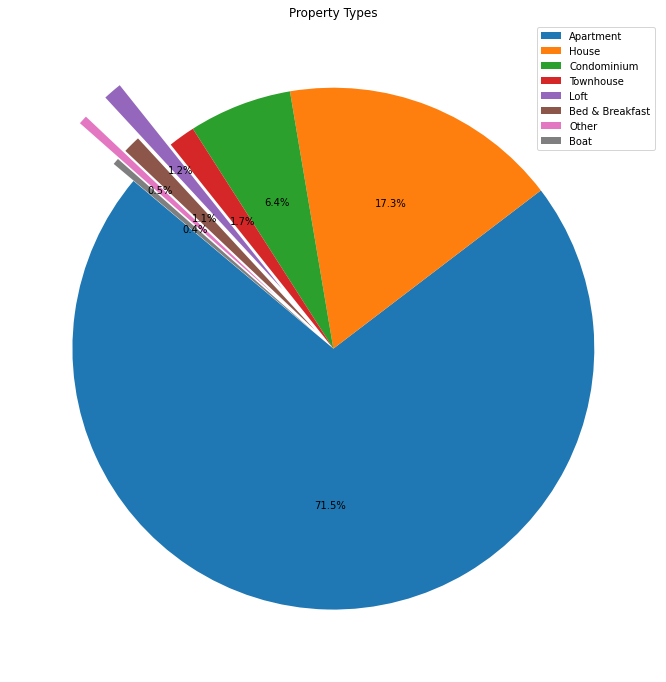

In [14]:
#Plot a Pie chart of property type distribution
#colors = ['pink', 'green', '']
explode = (0,0,0,0,0.3,0.1,0.3,0.1)
labels = (prop_count.index)
prop_pie = prop_count.plot.pie(y=count, figsize=(12,12), startangle=140, explode = explode, autopct="%1.1f%%", labeldistance = None, title = "Property Types")
plt.xlabel("")
plt.ylabel("")
plt.legend(labels, loc = "upper right")

In [15]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Property Type')

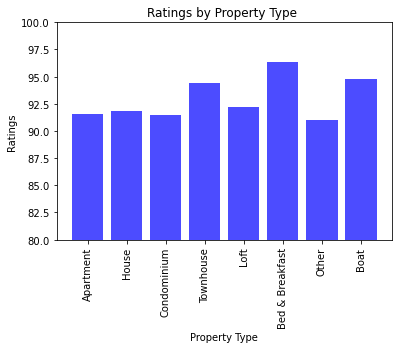

In [16]:
# Group data by Property Type and finding the mean of all columns
bar1_data = prop_type.groupby(['property_type']).mean()
bar1_data

y_axis = bar1_data["review_scores_rating"]
x_axis = labels
plt.bar(x_axis, y_axis, color='b', alpha=0.7, align='center')
plt.title("Ratings by Property Type ")
plt.ylim(80, 100)
plt.xticks(rotation = 'vertical')
plt.ylabel("Ratings")
plt.xlabel("Property Type")

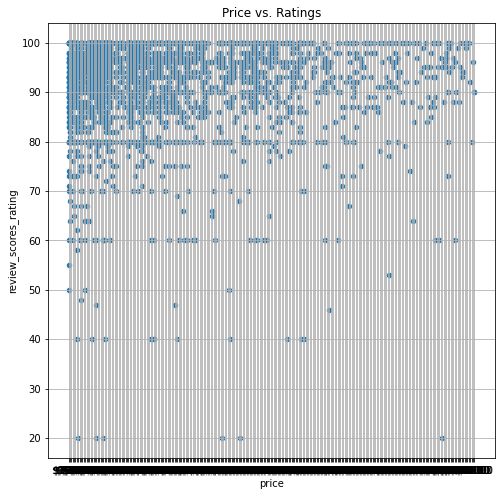

In [17]:
price_bins = [10, 85, 150, 220, 4001]

prop_type.plot(kind="scatter", x="price", y="review_scores_rating", grid=True, figsize=(8,8),
title="Price vs. Ratings")

plt.show()